This study guide should reinforce and provide practice for all of the concepts you have seen in the past week. There are a mix of written questions and coding exercises, both are equally important to prepare you for the sprint challenge as well as to be able to speak on these topics comfortably in interviews and on the job.

If you get stuck or are unsure of something remember the 20 minute rule. If that doesn't help, then research a solution with google and stackoverflow. Only once you have exausted these methods should you turn to your Team Lead - they won't be there on your SC or during an interview. That being said, don't hesitate to ask for help if you truly are stuck.

Have fun studying!

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# TfidfVectorizer().fit_transform([['a', 'word'],['more', 'words']]).todense()
# you can't straight up pass list of stringsm you need to pass a string and let
# it figure it out

In [1]:
import pandas as pd
import re
import spacy
from collections import Counter
import seaborn as sns

In [2]:
nlp = spacy.load("en_core_web_lg")

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/bundickm/Study-Guides/master/data/cannabis.csv')
print('Shape:', df.shape, '\n')
df.head()

Shape: (2351, 6) 



,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%..."


In [4]:
df.dropna(inplace=True)

In [5]:
df.Description[2]

'1024 is a sativa-dominant hybrid bred in Spain by Medical Seeds Co. The breeders claim to guard the secret genetics due to security reasons, but regardless of its genetic heritage, 1024 is a THC powerhouse with a sweet and spicy bouquet. Subtle fruit flavors mix with an herbal musk to produce uplifting sativa effects. One specific phenotype is noted for having a pungent odor that fills a room, similar to burning incense.'

# Tokens

## Definitions

Define the following terms in your own words, do not simply copy and paste a definition found elsewhere but reword it to be understandable and memorable to you. *Double click the markdown to add your definitions.*
<br/><br/>

**Natural Language Processing**: Taking human speak and vectorizing it to make predictions

**Token**: The words that will be vetorized

**Corpus**: The vocabulary

**Stopwords**: Words you dont want to include in the analysis

**Statistical Trimming**: Excluding extremes

**Stemming**: The .strip() of cleaning tokens

**Lemmatization**: Transforming a token into it's root word

**Vectorization**: Taking tokens and representing them as numbers

## Questions of Understanding

1. What are at least 4 common cleaning tasks you need to do when creating tokens?
 1. `Your Answer Here`
 2. `Your Answer Here`
 3. `Your Answer Here`
 4. `Your Answer Here`

2. Why is it important to apply custom stopwords to our dataset in addition to the ones that come in a library like spaCy?

My data carries a common theme, therfore common words, that spacy did not plan for so it would behoove me to remove custom stop words

3. Explain the tradeoffs between statistical trimming, stemming, and lemmatizing.

Time to compute, lemmatization has the longest time. Trimming lowers time by shortenning the corpus. Stemming sucks

4. Why do we need to vectorize our documents?

Computers don't know how to use words to make prediction

## Practice Problems

Write a function to tokenize the `Description` column. Make sure to include the following:
- Return the tokens in an iterable structure
- Normalize the case
- Remove non-alphanumeric characters such as punctuation, whitespace, unicode, etc.
- Apply stopwords and make sure to add stopwords specific to this dataset
- Lemmatize the tokens before returning them

In [6]:
stops = nlp.Defaults.stop_words.union(['weed', 'blunt', 'marijuana', 'high'])

def tokenize(text):
    lower = text.lower()
    subbed = re.sub(r'[^\w\s-]', '', lower)
    temp = []
    for word in nlp(subbed):
        if ((word not in stops) and
            (not word.is_punct) and
            (word.pos_ != 'PRON')):
            temp.append(word.lemma_)
    return temp

In [ ]:
# df['tokens'] = df['Description'].apply(tokenize)
# df.head()

# Use the function below to create a `word_count` dataframe based off the `df['Tokens']` column you created.

In [ ]:
def count(docs):
        word_counts = Counter()
        appears_in = Counter()
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [7]:
# count_df = df['tokens'].apply(count)

Run the line of code below, and then explain how to interpret the graph.

```
Your Answer Here
```

In [8]:
# sns.lineplot(x='rank', y='cul_pct_total', data=count_df);

# Vectorization

## Definitions

Define the following terms in your own words, do not simply copy and paste a definition found elsewhere but reword it to be understandable and memorable to you. *Double click the markdown to add your definitions.*
<br/><br/>

**Vectorization**: Taking tokens and representing them as numbers

**Document Term Matrix (DTM)**: Matrix that represents each document's tokens

**Latent Semantic Analysis**: `Your Answer Here`

**Term Frequency - Inverse Document Frequency (TF-IDF)**: `Your Answer Here`

**Word Embedding**: `Your Answer Here`

**N-Gram**: `Your Answer Here`

**Skip-Gram**: `Your Answer Here`

## Questions of Understanding

1. Why do we need to vectorize our documents?

Because machinee don't know what words mean

2. How is TF-IDF different from simple word frequency? Why do we use TF-IDF over word frequency?

It's some proportion of the word's appearence in the whole corpus instead of just how many times it appears in 1 doc

3. Why might we choose a word embedding approach over a bag-of-words approach when it comes to vectorization?

Better results

## Practice Problems

Use the dataframe `df` above to complete the following.

Vectorize the `Tokens` column.

In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
neigh_pipe = make_pipeline(TfidfVectorizer(tokenizer=tokenize), NearestNeighbors(n_jobs=-1));
neigh_pipe.fit(df['Description'])

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function tokenize at 0x7f3ae5679b70>,
                                 use_idf=True, vocabulary=None)),
                ('nearestneighbors',
                 NearestNeighbors(algorithm='auto', leaf_size=30,
                         

Build a Nearest Neighbors model from your dataframe and then find the 5 nearest neighbors to the strain "100-OG"

In [17]:
neigh_pipe.named_steps['nearestneighbors'].kneighbors(neigh_pipe.named_steps['tfidfvectorizer'].transform(["100-OG"]).todense())

(array([[1., 1., 1., 1., 1.]]), array([[ 105,  662, 1186,  352, 1553]]))

You will be putting together a classification model below, but before you do you'll need a baseline. Run the line of code below and then find the normalized value counts for the `Rating` column in `df`.

In [18]:
df['Rating'] = df['Rating'].round().astype(int)

<AxesSubplot:xlabel='Rating'>

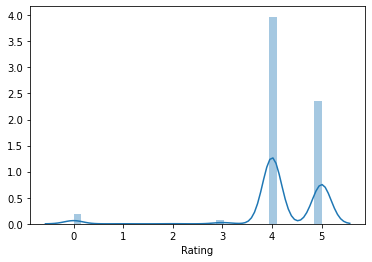

In [19]:
sns.distplot(df.Rating)

What is the baseline accuracy?
```
Your Answer Here
```

Visualize the rating counts from above

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
log_pipe = make_pipeline(TfidfVectorizer(tokenizer=tokenize), LogisticRegression(n_jobs=-1, random_state=42));
log_pipe.fit(df.Description, df.Rating);

Use your vectorized tokens in the `df` dataframe to train a classification model

In [22]:
print(f"Train score: {log_pipe.score(df.Description, df.Rating)}")

Train score: 0.8454106280193237


Predict the score of the fake strain description below.

```
'Afgooey, also known as Afgoo, is a potent indica strain that is believed to descend from an Afghani indica and Maui Haze. 
Its sativa parent may lend Afgoo some uplifting, creative qualities, but this strain undoubtedly takes after its indica 
parent as it primarily delivers relaxing, sleepy effects alongside its earthy pine flavor. Growers hoping to cultivate Afgoo 
may have a better chance of success indoors, but this indica can also thrive in Mediterranean climates outdoors.'
```

In [25]:
log_pipe.predict(["""Afgooey, also known as Afgoo, is a potent indica strain that is believed to descend from an Afghani indica and Maui Haze. 
Its sativa parent may lend Afgoo some uplifting, creative qualities, but this strain undoubtedly takes after its indica 
parent as it primarily delivers relaxing, sleepy effects alongside its earthy pine flavor. Growers hoping to cultivate Afgoo 
may have a better chance of success indoors, but this indica can also thrive in Mediterranean climates outdoors."""])[0]

4

# Topic Modeling

## Questions of Understanding

1. What is Latent Dirichlet Allocation? What is another name for LDA in NLP?
```
Your Answer Here
```

2. How do interpret the results of a topic modeling output?
```
Your Answer Here
```

## Practice Problems

Find the top 5 topics of the `Description` column using LDA

In [26]:
import gensim
from gensim import corpora
from gensim.models.ldamulticore import LdaMulticore

In [31]:
df['token'] = df.Description.apply(tokenize)
id2word = corpora.Dictionary(df['token'])

In [33]:
id2word.filter_extremes(no_below=15, no_above=0.85)
corpus = [id2word.doc2bow(text) for text in df['token']]

In [34]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   num_topics=5,
                   passes=50, 
                   workers=12
                  )

In [ ]:
words = [re.findall(r'"[^"]*"', t[1]) for t in lda.print_topics(5)]
topic_labels = [', '.join(t[0:5]) for t in words]

In [35]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [37]:
# pyLDAvis.gensim.prepare(lda, corpus, id2word)

/home/allan/.local/share/virtualenvs/u4-s1-1fz81KSO/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In a short paragraph, explain how to interpret the first topic your model came up with. If your topic words are difficult to interpret, explain how you could clean up the descriptions to improve your topics

Points out like 5 strain. 1 is kush, 2 & 4 are indica, 3 is sativa, 4 is diesel

Use `pyLDAvis` to create a visualization to help you interpret your topic modeling results

Explain how to interpret the results of `pyLDAvis`

It cluster the docs into n topics so what are most of the descriptions about given tfidf the descrip

Create at least 1 more visualization to help you interpret the results of your topic modeling